In [22]:
import pandas as pd
import os

dir_path = "../.."
#dir_path = "e2_results"
file_data = "Out_12_bis_PLAID.csv"
#file_data = "Out_E2_bis-FaceAll.csv"
#file_data = "Out_240214_bis-GesturePebble.csv"

colnames = ['index','dataset', 'num', 'num_data_pts', 'num_outliers_removed','num_coeffs','method','max_dist', 'MSE', 'MAE','mean_diff', 'max_fst_derivative', 'max_snd_derivative','avg_fst_derivative','avg_snd_derivative']
#e2 = pd.read_csv(os.path.join(dir_path, file_data), names=colnames, header=None,sep=',',index_col=False).drop_duplicates().reset_index()
e2 = pd.read_csv(os.path.join(dir_path, file_data), names=colnames).drop_duplicates()
e2 = e2.drop("index",axis=1)
e2

,dataset,num,num_data_pts,num_outliers_removed,num_coeffs,method,max_dist,MSE,MAE,mean_diff,max_fst_derivative,max_snd_derivative,avg_fst_derivative,avg_snd_derivative
0,Adiac,0,176,0,52,L8,0.011749,0.000076,0.007802,-0.5,0.101923,0.036944,-0.000029,0.000119
1,Adiac,0,176,0,52,L8 and L1,0.011749,0.000045,0.005135,-0.5,0.101923,0.036944,-0.000029,0.000119
2,Adiac,0,176,0,52,LSQ,0.016260,0.000032,0.004356,-0.5,0.101923,0.036944,-0.000029,0.000119
3,Adiac,0,176,0,52,PAA,0.151207,0.011046,0.091971,-0.5,0.101923,0.036944,-0.000029,0.000119
4,Adiac,0,176,0,52,PLA,0.018072,0.000170,0.011520,-0.5,0.101923,0.036944,-0.000029,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129128,PLAID,204,200,0,60,LSQ,0.544107,0.083387,0.247256,-0.5,1.691753,1.691702,0.015104,-0.000139
129129,PLAID,204,200,0,60,PAA,1.359326,1.195138,1.047555,-0.5,1.691753,1.691702,0.015104,-0.000139
129130,PLAID,204,200,0,60,PLA,0.430085,0.114441,0.311887,-0.5,1.691753,1.691702,0.015104,-0.000139
129131,PLAID,204,200,0,60,DFT,1.228040,0.105147,0.285672,-0.5,1.691753,1.691702,0.015104,-0.000139


# for each method: accuracy measures (max_dist, MSE, MAE)
Question: How does our method compare to other methods for time series approximation and/or compression? Can it be improved by including an L1 fitting?

In [23]:
import pandas as pd
#pd.set_option('display.float_format', '{:.8f}'.format)
mean_values = e2.groupby('method').agg({'max_dist': 'mean', 'MSE': 'mean', 'MAE': 'mean'}).reset_index()
mean_values

,method,max_dist,MSE,MAE
0,DFT,1.489538,0.285541,0.244937
1,L8,1.032432,1.290803,0.701576
2,L8 and L1,1.032454,0.880703,0.496192
3,LSQ,1.540400,0.216252,0.194317
4,PAA,1.492017,3.418836,1.336837
5,PLA,1.146426,0.540436,0.449122


In [ ]:
import matplotlib.pyplot as plt

# Plot mean values
plt.figure(figsize=(10, 6))

plt.bar(mean_values['method'], mean_values['max_dist'], color='b', label='Mean Max Dist')
#plt.bar(mean_values['method'], mean_values['MAE'],color='g', label='Mean MAE')
plt.bar(mean_values['method'], mean_values['MSE'],color='r', label='Mean MSE')
plt.xlabel('Method')
plt.ylabel('Mean Value')
plt.title('Mean max. distance, MSE, and MAE per method')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

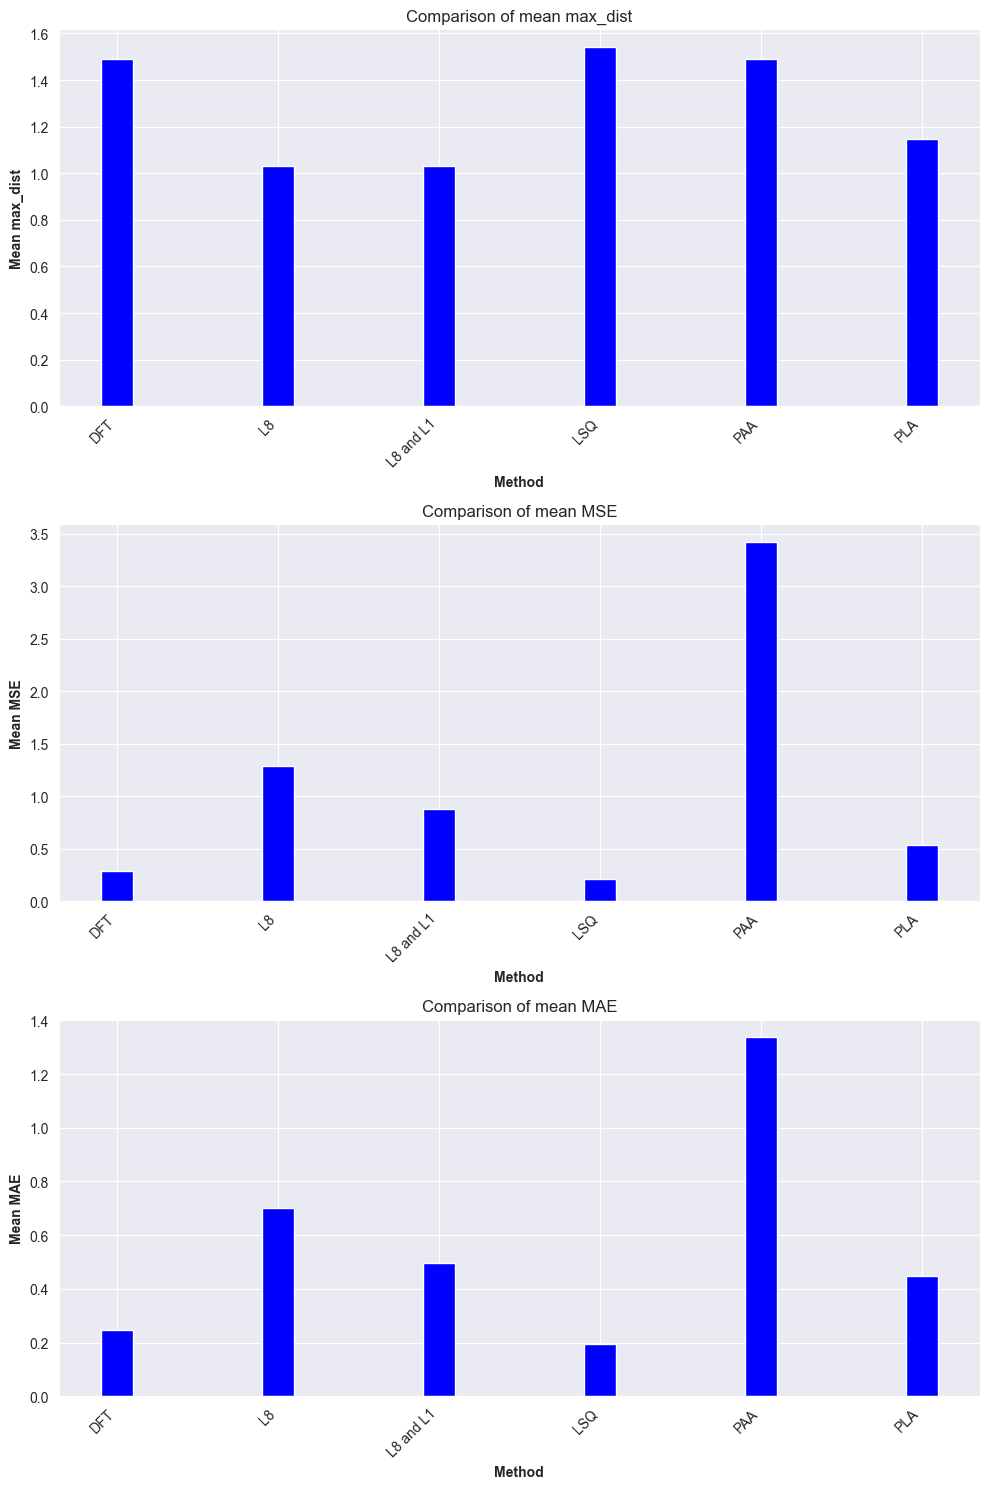

In [25]:
import matplotlib.pyplot as plt
import numpy as np

methods = mean_values['method']
metrics = ['max_dist','MSE', 'MAE', ]

bar_width = 0.2
num_methods = len(methods)
r = np.arange(num_methods)

fig, axs = plt.subplots(len(metrics), figsize=(10, 15))

for i, metric in enumerate(metrics):
    mean_val = mean_values[metric]
    metric_without_outliers = mean_values[f'{metric}']

    r1 = r + bar_width/2

    axs[i].bar(r1, mean_val, color='b', width=bar_width)#, label='?')

    axs[i].set_xlabel('Method', fontweight='bold')
    axs[i].set_ylabel(f'Mean {metric}', fontweight='bold')
    axs[i].set_xticks([r + bar_width/2 for r in range(num_methods)])
    axs[i].set_xticklabels(methods, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of mean {metric}')
    #axs[i].legend()

plt.tight_layout()
plt.show()

# for each method: outliers vs. no outliers
Question: Does the removal of outliers increase the accuracy of the approximated time series? 
(If so: outliers need to be saved separately!)

In [26]:
df_no_outliers = e2[e2['num_outliers_removed'] > 0]
print(len(df_no_outliers.index))
df_with_outliers = e2[e2['num_outliers_removed'] == 0]
print(len(df_with_outliers.index))

mean_values_no_outliers = df_no_outliers.groupby('method').agg({
    'max_dist': 'mean',
    'MSE': 'mean', 
    'MAE': 'mean'}).reset_index()
mean_values_no_outliers.rename(columns={
    'max_dist': 'max_dist w/o outliers', 
    'MSE': 'MSE w/o outliers', 
    'MAE': 'MAE w/o outliers'}, inplace=True)

mean_values_with_outliers = df_with_outliers.groupby('method').agg({
    'max_dist': 'mean', 
    'MSE': 'mean', 
    'MAE': 'mean'}).reset_index()

mean_values_with_outliers.rename(columns={
    'max_dist': 'max_dist', 
    'MSE': 'MSE', 
    'MAE': 'MAE'}, inplace=True)

mean_values_combined = pd.merge(mean_values_with_outliers, mean_values_no_outliers, on='method', how='outer')
mean_values_combined

0
129133


,method,max_dist,MSE,MAE,max_dist w/o outliers,MSE w/o outliers,MAE w/o outliers
0,DFT,1.489538,0.285541,0.244937,NaN,NaN,NaN
1,L8,1.032432,1.290803,0.701576,NaN,NaN,NaN
2,L8 and L1,1.032454,0.880703,0.496192,NaN,NaN,NaN
3,LSQ,1.540400,0.216252,0.194317,NaN,NaN,NaN
4,PAA,1.492017,3.418836,1.336837,NaN,NaN,NaN
5,PLA,1.146426,0.540436,0.449122,NaN,NaN,NaN


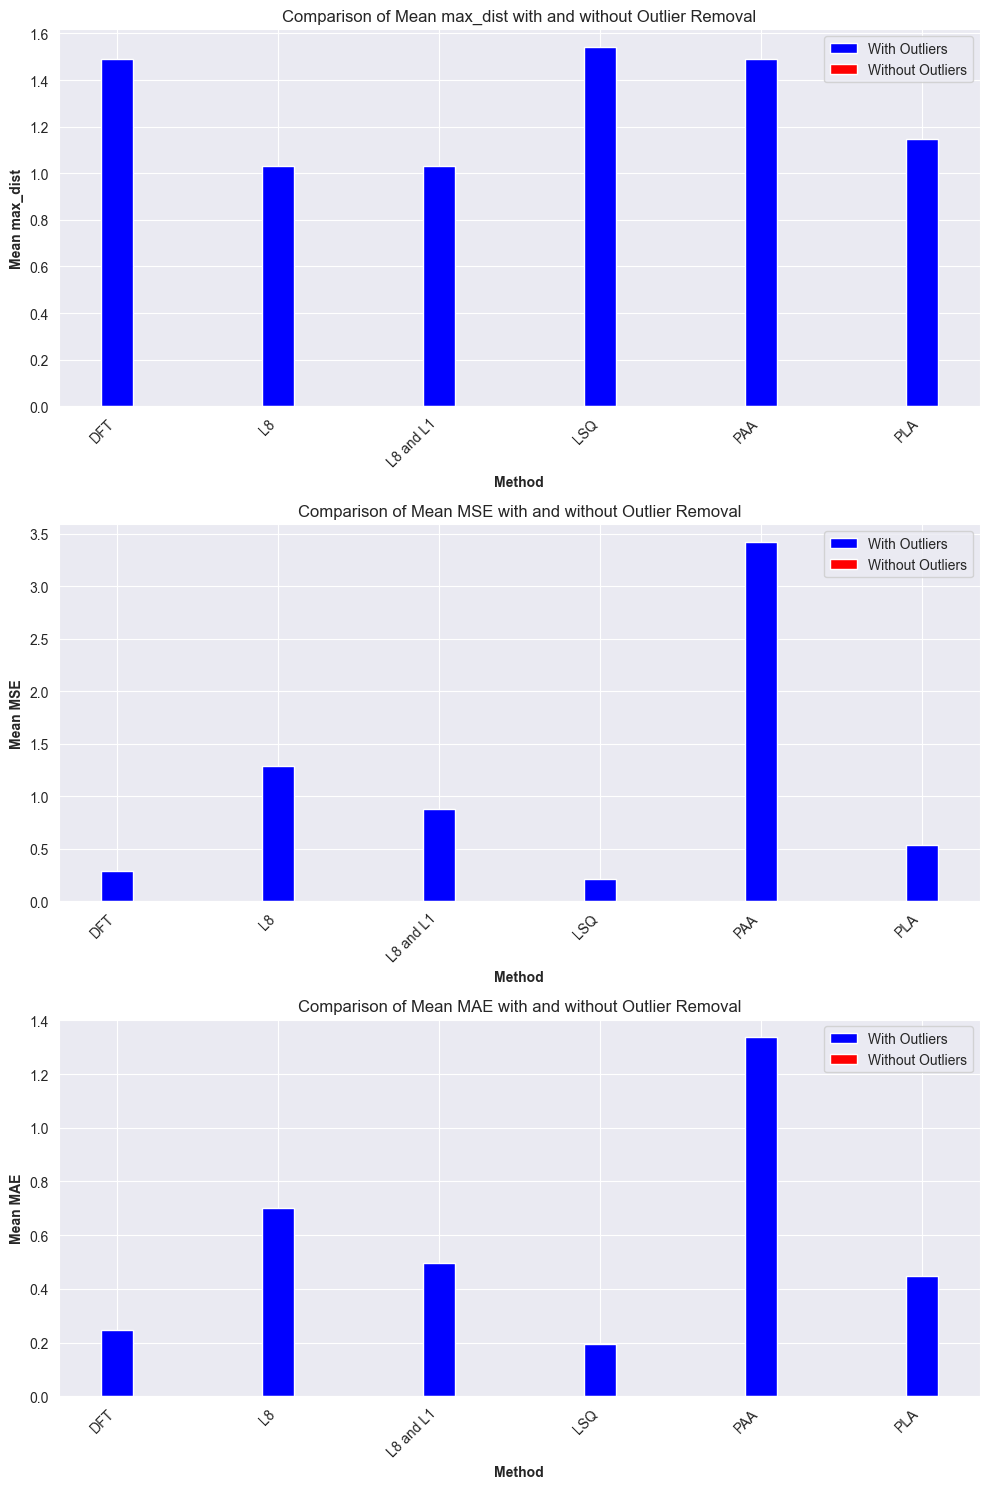

In [27]:
import matplotlib.pyplot as plt
import numpy as np

methods = mean_values_combined['method']
metrics = ['max_dist','MSE', 'MAE']

bar_width = 0.2
num_methods = len(methods)
r = np.arange(num_methods)

fig, axs = plt.subplots(len(metrics), figsize=(10, 15))

for i, metric in enumerate(metrics):
    metric_with_outliers = mean_values_combined[metric]
    metric_without_outliers = mean_values_combined[f'{metric} w/o outliers']

    r1 = r + bar_width/2
    r2 = [x + bar_width for x in r1]

    axs[i].bar(r1, metric_with_outliers, color='b', width=bar_width, label='With Outliers')
    axs[i].bar(r2, metric_without_outliers, color='r', width=bar_width, label='Without Outliers')

    axs[i].set_xlabel('Method', fontweight='bold')
    axs[i].set_ylabel(f'Mean {metric}', fontweight='bold')
    axs[i].set_xticks([r + bar_width/2 for r in range(num_methods)])
    axs[i].set_xticklabels(methods, rotation=45, ha='right')
    axs[i].set_title(f'Comparison of Mean {metric} with and without Outlier Removal')
    axs[i].legend()

plt.tight_layout()
plt.show()

# for L8-L1: correlation between accuracy measures and time series properties
Question: Does our method approximate time series with certain properties more/less accurately?

In [28]:
df_max_l1 = e2[e2['method'] == 'L8 and L1']

In [29]:
correlation_matrix = df_max_l1[
    ['max_dist', 'MSE', 'MAE', 'num_data_pts', 'mean_diff', 'max_fst_derivative', 'max_snd_derivative']].corr()
print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,max_dist,MSE,MAE,num_data_pts,mean_diff,max_fst_derivative,max_snd_derivative
max_dist,1.000000,0.908882,0.931397,-0.170264,NaN,0.966108,0.952165
MSE,0.908882,1.000000,0.937290,-0.207267,NaN,0.867452,0.827723
MAE,0.931397,0.937290,1.000000,-0.291316,NaN,0.886164,0.862772
num_data_pts,-0.170264,-0.207267,-0.291316,1.000000,NaN,-0.149618,-0.143524
mean_diff,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_fst_derivative,0.966108,0.867452,0.886164,-0.149618,NaN,1.000000,0.940785
max_snd_derivative,0.952165,0.827723,0.862772,-0.143524,NaN,0.940785,1.000000


In [30]:
df_max_l1.iloc[:,2:]

,num_data_pts,num_outliers_removed,num_coeffs,method,max_dist,MSE,MAE,mean_diff,max_fst_derivative,max_snd_derivative,avg_fst_derivative,avg_snd_derivative
1,176,0,52,L8 and L1,0.011749,0.000045,0.005135,-0.5,0.101923,0.036944,-0.000029,0.000119
7,176,0,52,L8 and L1,0.012883,0.000035,0.003893,-0.5,0.085461,0.026505,-0.000177,0.000566
13,176,0,52,L8 and L1,0.011407,0.000031,0.004077,-0.5,0.100665,0.027670,-0.000079,0.000234
19,176,0,52,L8 and L1,0.023391,0.000108,0.006655,-0.5,0.087433,0.021437,0.000073,0.000563
25,176,0,52,L8 and L1,0.021331,0.000132,0.008671,-0.5,0.126524,0.071556,-0.000117,-0.000042
...,...,...,...,...,...,...,...,...,...,...,...,...
129103,200,0,60,L8 and L1,0.552119,0.133910,0.305013,-0.5,2.218360,2.220038,0.012535,-0.001029
129109,200,0,60,L8 and L1,0.602884,0.142287,0.310654,-0.5,2.509115,2.361697,0.016048,0.002996
129115,200,0,60,L8 and L1,0.667312,0.156119,0.313373,-0.5,1.725745,1.725218,0.015619,-0.001529
129121,167,0,50,L8 and L1,0.532080,0.104094,0.265064,-0.5,2.010495,2.010048,0.007913,-0.005303


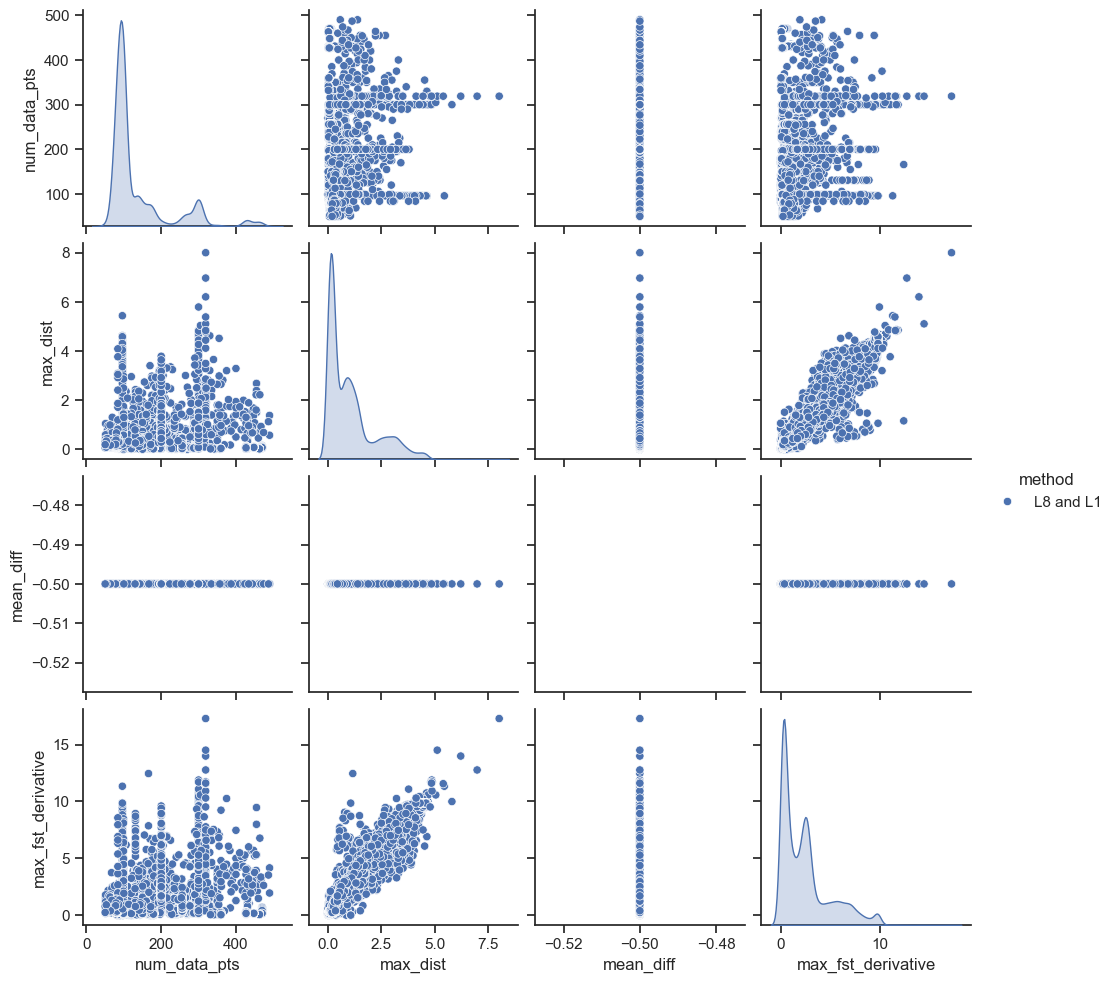

In [31]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df_max_l1[['num_data_pts','method','max_dist','mean_diff','max_fst_derivative']],hue="method")
#sns.pairplot(df_max_l1[2:],hue="method")

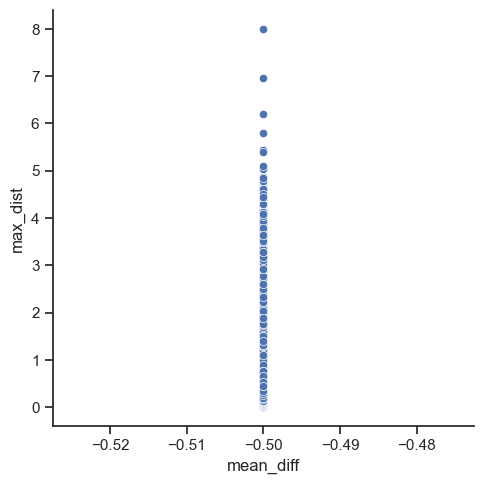

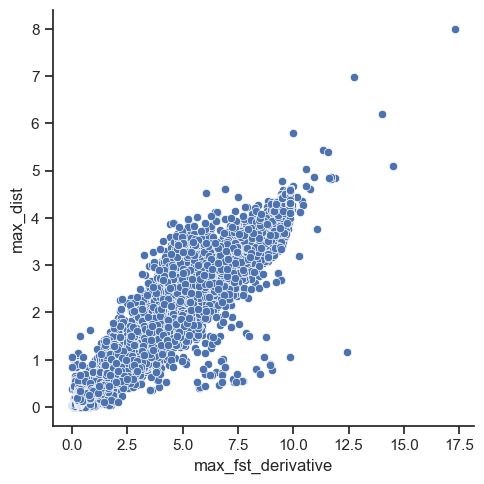

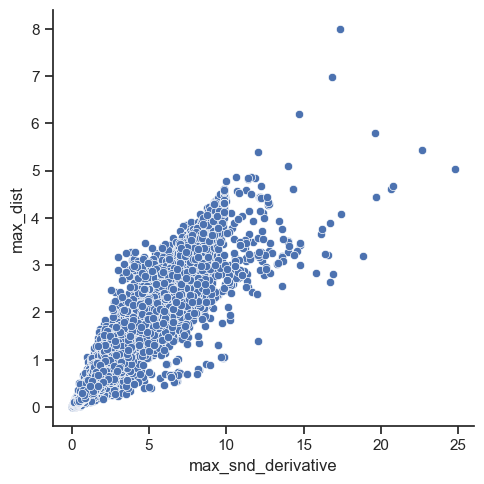

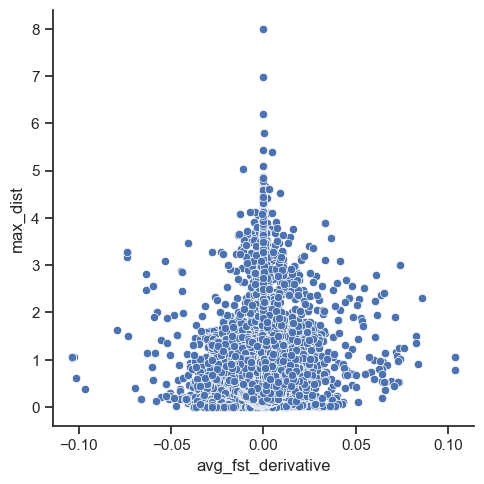

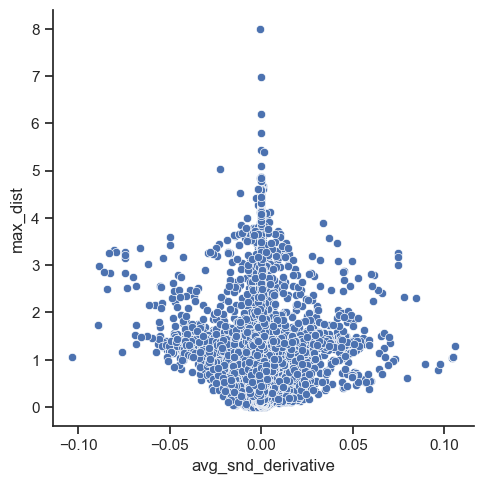

In [33]:
for measurement in ['mean_diff','max_fst_derivative','max_snd_derivative','avg_fst_derivative','avg_snd_derivative']:
    sns.relplot(data=df_max_l1, x=measurement, y="max_dist")

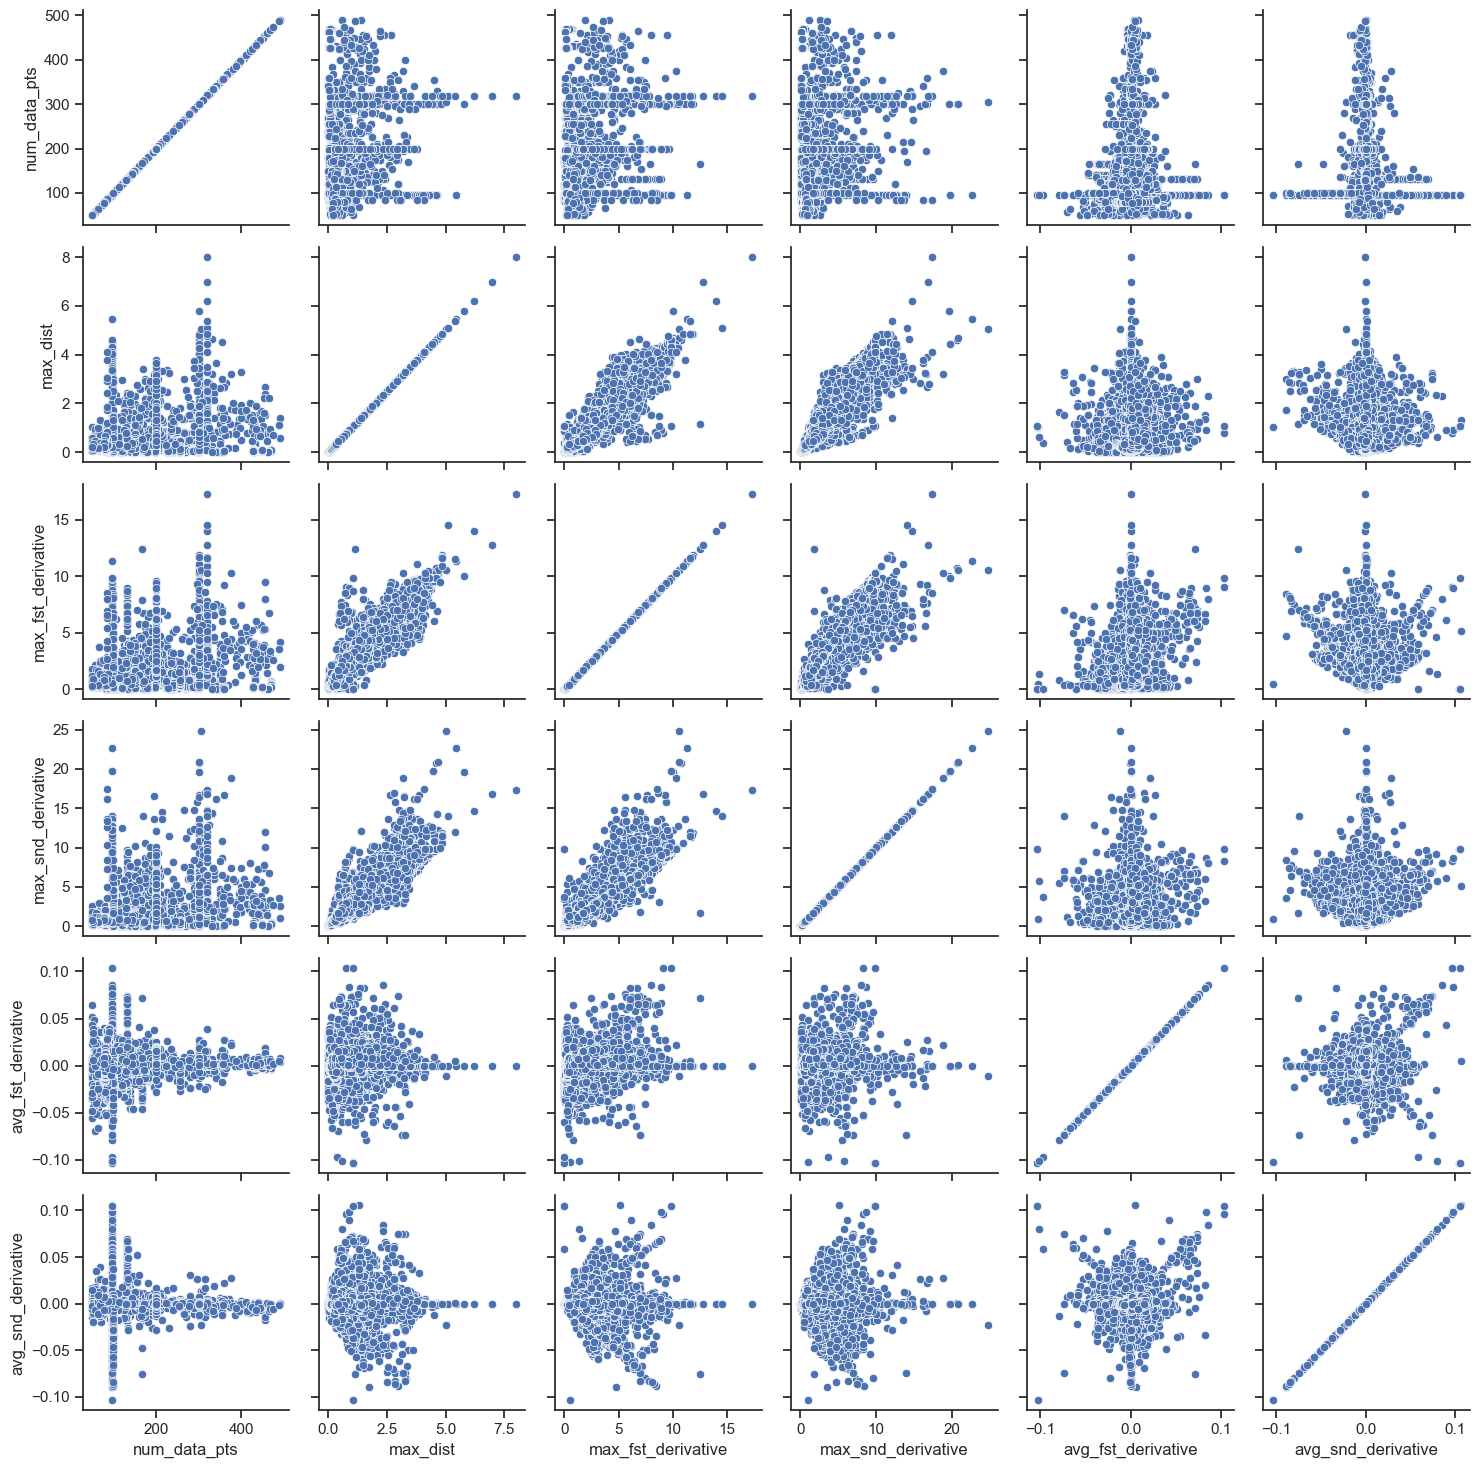

In [39]:
#g = sns.PairGrid(df_max_l1[['num_outliers_removed','num_data_pts','max_dist','mean_diff','max_fst_derivative','max_snd_derivative','avg_fst_derivative','avg_snd_derivative']]).map(sns.scatterplot)
g = sns.PairGrid(df_max_l1[['num_data_pts','max_dist','max_fst_derivative','max_snd_derivative','avg_fst_derivative','avg_snd_derivative']]).map(sns.scatterplot)

In [ ]:
"""import seaborn as sns
sns.set_theme(style="ticks")
# for method in ['L8', 'L8 and L1', 'LSQ', 'PAA', 'PLA', 'DFT']:
df = e2[e2['method']=='L8 and L1']
#sns.pairplot(df[['num_data_pts','method','max_dist','mean_diff','max_fst_derivative']],hue="method")
sns.pairplot(df[2:],hue="method")"""